In [1]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.1 MB/s eta 0:00:00


In [2]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 40.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from gurobipy import *

# Datos de entrada
costos = [10, 20, 30] # Costos de cada tamaño de estación
demand = [30, 20, 40, 10, 50] # Demanda en cada ubicación
ubicaciones = 5 # Número de ubicaciones
tamanos = 3 # Número de tamaños de estaciones

# Inicializar modelo
m = Model("Bicicletas compartidas")

# Variables de decisión
estaciones = {}
for i in range(ubicaciones):
    for j in range(tamanos):
        estaciones[i,j] = m.addVar(vtype=GRB.INTEGER, name="Estacion_"+str(i+1)+"_"+str(j+1))

# Función objetivo
m.setObjective(quicksum(costos[j] * estaciones[i,j] for i in range(ubicaciones) for j in range(tamanos)), GRB.MINIMIZE)

# Restricciones
for i in range(ubicaciones):
    m.addConstr(quicksum(estaciones[i,j] for j in range(tamanos)) >= demand[i], "Demanda_"+str(i+1))

# Resolver modelo
m.optimize()

# Imprimir resultados
for i in range(ubicaciones):
    for j in range(tamanos):
        if estaciones[i,j].x > 0:
            print("Ubicación", i+1, "tamaño", j+1, "cantidad", estaciones[i,j].x)


Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 5 rows, 15 columns and 15 nonzeros
Model fingerprint: 0x29f9c57b
Variable types: 0 continuous, 15 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 3e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 5e+01]
Found heuristic solution: objective 4500.0000000
Presolve removed 5 rows and 15 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 1500 4500 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.500000000000e+03, best bound 1.500000000000e+03, gap 0.00

In [ ]:
from gurobipy import *

# Datos de entrada
costos = [10, 20, 30] # Costos de cada tamaño de estación
demand = [30, 20, 40, 10, 50] # Demanda en cada ubicación
ubicaciones = 5 # Número de ubicaciones
tamanos = 3 # Número de tamaños de estaciones

# Inicializar modelo
m = Model("Bicicletas compartidas")

# Variables de decisión
abrir = {} # Indicador si una estación se abre o no
estaciones = {} # Número de bicicletas en una estación abierta
for i in range(ubicaciones):
    for j in range(tamanos):
        abrir[i,j] = m.addVar(vtype=GRB.BINARY, name="Abrir_"+str(i+1)+"_"+str(j+1))
        estaciones[i,j] = m.addVar(vtype=GRB.INTEGER, name="Estacion_"+str(i+1)+"_"+str(j+1))

# Función objetivo
m.setObjective(quicksum(costos[j] * abrir[i,j] for i in range(ubicaciones) for j in range(tamanos)), GRB.MINIMIZE)

# Restricciones
for i in range(ubicaciones):
    m.addConstr(quicksum(estaciones[i,j] for j in range(tamanos)) >= demand[i], "Demanda_"+str(i+1))
    for j in range(tamanos):
        m.addConstr(estaciones[i,j] <= abrir[i,j] * 10000, "Estaciones_abiertas_"+str(i+1)+"_"+str(j+1))

# Resolver modelo
m.optimize()

# Imprimir resultados
for i in range(ubicaciones):
    for j in range(tamanos):
        if abrir[i,j].x > 0:
            print("Ubicación", i+1, "tamaño", j+1, "cantidad", estaciones[i,j].x)


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 20 rows, 30 columns and 45 nonzeros
Model fingerprint: 0xfd3ff7e3
Variable types: 0 continuous, 30 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+01, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+01]
Found heuristic solution: objective 130.0000000
Presolve removed 20 rows and 30 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 50 130 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.000000000000e+01, best bound 5.000000000000e+01, gap 0.0000%
Ubicación 1 tamaño 1 cantidad 10000.0
Ubicación 2 tamaño 1 cantidad

In [ ]:
from pulp import *

# Datos de entrada
costos = [10, 20, 30] # Costos de cada tamaño de estación
demand = [30, 20, 40, 10, 50] # Demanda en cada ubicación
ubicaciones = 5 # Número de ubicaciones
tamanos = 3 # Número de tamaños de estaciones

# Inicializar modelo
m = LpProblem("Bicicletas compartidas", LpMinimize)

# Variables de decisión
abrir = LpVariable.dicts("Abrir", [(i, j) for i in range(ubicaciones) for j in range(tamanos)], 0, 1, LpBinary)
estaciones = LpVariable.dicts("Estacion", [(i, j) for i in range(ubicaciones) for j in range(tamanos)], 0, None, LpInteger)

# Función objetivo
m += lpSum(costos[j] * abrir[i,j] for i in range(ubicaciones) for j in range(tamanos))

# Restricciones
for i in range(ubicaciones):
    m += lpSum(estaciones[i,j] for j in range(tamanos)) >= demand[i], "Demanda_"+str(i+1)
    for j in range(tamanos):
        m += estaciones[i,j] <= abrir[i,j] * 10000, "Estaciones_abiertas_"+str(i+1)+"_"+str(j+1)

# Resolver modelo
m.solve()

# Imprimir resultados
for i in range(ubicaciones):
    for j in range(tamanos):
        if abrir[i,j].value() > 0:
            print("Ubicación", i+1, "tamaño", j+1, "cantidad", estaciones[i,j].value())


Ubicación 1 tamaño 1 cantidad 30.0
Ubicación 2 tamaño 1 cantidad 20.0
Ubicación 3 tamaño 1 cantidad 40.0
Ubicación 4 tamaño 1 cantidad 10.0
Ubicación 5 tamaño 1 cantidad 50.0


/usr/local/lib/python3.8/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
from pulp import *

# Datos de entrada
costos = [10, 20, 30] # Costos de cada tamaño de estación
demand = [30, 20, 40, 10, 50] # Demanda en cada ubicación
ubicaciones = 5 # Número de ubicaciones
tamanos = 3 # Número de tamaños de estaciones
distancia_maxima = 10 # Distancia máxima entre estaciones

# Inicializar modelo
m = LpProblem("Bicicletas compartidas", LpMinimize)

# Variables de decisión
abrir = LpVariable.dicts("Abrir", [(i, j) for i in range(ubicaciones) for j in range(tamanos)], 0, 1, LpBinary)
estaciones = LpVariable.dicts("Estacion", [(i, j) for i in range(ubicaciones) for j in range(tamanos)], 0, None, LpInteger)

# Función objetivo
m += lpSum(costos[j] * abrir[i,j] for i in range(ubicaciones) for j in range(tamanos))

# Restricciones
for i in range(ubicaciones):
    m += lpSum(estaciones[i,j] for j in range(tamanos)) >= demand[i], "Demanda_"+str(i+1)
    for j in range(tamanos):
        m += estaciones[i,j] <= abrir[i,j] * 10000, "Estaciones_abiertas_"+str(i+1)+"_"+str(j+1)

for i in range(ubicaciones):
    for j in range(i+1, ubicaciones):
        m += lpSum(abrir[i,k] + abrir[j,k] for k in range(tamanos)) <= 1, "Distancia_maxima_"+str(i+1)+"_"+str(j+1)

# Resolver modelo
m.solve()

# Imprimir resultados
for i in range(ubicaciones):
    for j in range(tamanos):
        if abrir[i,j].value() > 0:
            print("Ubicación", i+1, "tamaño", j+1, "cantidad", estaciones[i,j].value())


Ubicación 1 tamaño 1 cantidad 30.0
Ubicación 2 tamaño 1 cantidad 20.0
Ubicación 3 tamaño 1 cantidad 40.0
Ubicación 4 tamaño 1 cantidad 10.0
Ubicación 5 tamaño 1 cantidad 50.0


Prediccion de la demanda

The predicted demand for New Location 1 is 792.68
The predicted demand for New Location 2 is 714.48


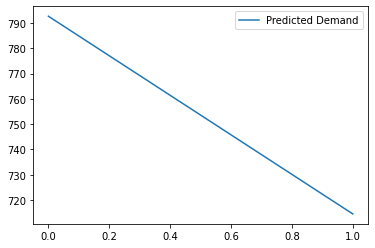

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Invented data for 10 locations in Bogota
location_names = ['Location 1', 'Location 2', 'Location 3', 'Location 4', 'Location 5',
                  'Location 6', 'Location 7', 'Location 8', 'Location 9', 'Location 10']
population_density = np.random.randint(1000, 10000, size=10)
age = np.random.randint(20, 70, size=10)
income = np.random.randint(10000, 100000, size=10)
tourists = np.random.randint(0, 1000, size=10)
temperature = np.random.randint(15, 35, size=10)
events = np.random.randint(0, 100, size=10)
demand = np.random.randint(100, 1000, size=10)

# Create a dataframe from the invented data
data = pd.DataFrame({'location': location_names,
                     'population_density': population_density,
                     'age': age,
                     'income': income,
                     'tourists': tourists,
                     'temperature': temperature,
                     'events': events,
                     'demand': demand})

# Use the population density, age, income, tourists, temperature, and events as predictors
X = data[['population_density', 'age', 'income', 'tourists', 'temperature', 'events']]
y = data['demand']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to make predictions on new data
new_data = pd.DataFrame({'location': ['New Location 1', 'New Location 2'],
                         'population_density': [5000, 6000],
                         'age': [40, 50],
                         'income': [50000, 60000],
                         'tourists': [500, 600],
                         'temperature': [25, 30],
                         'events': [50, 60]})
predictions = model.predict(new_data[['population_density', 'age', 'income', 'tourists', 'temperature', 'events']])

# Print the predictions
for location, prediction in zip(new_data['location'], predictions):
    print(f'The predicted demand for {location} is {prediction:.2f}')

# Plot the predictions
plt.plot(predictions, label='Predicted Demand')
plt.legend()
plt.show()


The predicted demand for New Location 1 is 513.26
The predicted demand for New Location 2 is 293.35


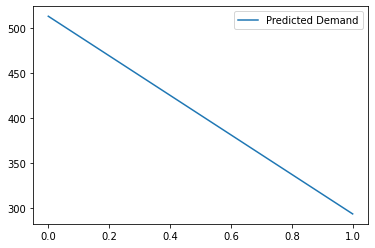

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Invented data for 10 locations in Bogota
location_names = ['Location 1', 'Location 2', 'Location 3', 'Location 4', 'Location 5',
                  'Location 6', 'Location 7', 'Location 8', 'Location 9', 'Location 10']
population_density = np.random.randint(1000, 10000, size=10)
age = np.random.randint(20, 70, size=10)
income = np.random.randint(10000, 100000, size=10)
tourists = np.random.randint(0, 1000, size=10)
temperature = np.random.randint(15, 35, size=10)
events = np.random.randint(0, 100, size=10)
demand = np.random.randint(100, 1000, size=10)

# Create a dataframe from the invented data
data = pd.DataFrame({'location': location_names,
                     'population_density': population_density,
                     'age': age,
                     'income': income,
                     'tourists': tourists,
                     'temperature': temperature,
                     'events': events,
                     'demand': demand})

# Use the population density, age, income, tourists, temperature, and events as predictors
X = data[['population_density', 'age', 'income', 'tourists', 'temperature', 'events']]
y = data['demand']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to make predictions on new data
new_data = pd.DataFrame({'location': ['New Location 1', 'New Location 2'],
                         'population_density': [5000, 6000],
                         'age': [40, 50],
                         'income': [50000, 60000],
                         'tourists': [500, 600],
                         'temperature': [25, 30],
                         'events': [50, 60]})
predictions = model.predict(new_data[['population_density', 'age', 'income', 'tourists', 'temperature', 'events']])

# Print the predictions
for location, prediction in zip(new_data['location'], predictions):
    print(f'The predicted demand for {location} is {prediction:.2f}')

# Plot the predictions
plt.plot(predictions, label='Predicted Demand')
plt.legend()
plt.show()


## **Añadir diferentes tamaños para las estaciones **

In [ ]:
import numpy as np
import pulp

# Invented data for 5 potential locations in Bogota
location_names = ['Location 1', 'Location 2', 'Location 3', 'Location 4', 'Location 5']
demand = np.random.randint(100, 1000, size=5)
distance = np.random.randint(1, 10, size=5)

# Costs for small, medium, and large stations
small_cost = 1000
medium_cost = 2000
large_cost = 3000

# Maximum distance between stations
max_distance = 7

# Define the decision variables
x = pulp.LpVariable.dicts('x', [(i, j) for i in range(len(location_names)) for j in range(3)],
                           cat=pulp.LpBinary) # binary variables indicating if a station is opened and what size it is

# Define the problem
prob = pulp.LpProblem('Bicycle Station Optimization', pulp.LpMinimize)

# Define the constraints
prob += pulp.lpSum([x[(i, j)] for i in range(len(location_names)) for j in range(3)]) == demand[i], f'Demand {i}'
prob += pulp.lpSum([x[(i, j)] * distance[i] for i in range(len(location_names)) for j in range(3)]) <= max_distance, 'Max Distance'
for i in range(len(location_names)):
    prob += pulp.lpSum([x[(i, j)] for j in range(3)]) <= 1, f'Size {i}'

# Define the objective function
prob += small_cost * pulp.lpSum([x[(i, 0)] for i in range(len(location_names))]) + \
        medium_cost * pulp.lpSum([x[(i, 1)] for i in range(len(location_names))]) + \
        large_cost * pulp.lpSum([x[(i, 2)] for i in range(len(location_names))])

# Solve the problem
prob.solve()

# Print the results
print(f'Optimal Cost: {pulp.value(prob.objective)}')
for i, location in enumerate(location_names):
    if x[(i, 0)].varValue:
        print(f'{location}: Small Station')
    elif x[(i, 1)].varValue:
        print(f'{location}: Medium Station')
    elif x[(i, 2)].varValue:
        print(f'{location}: Large Station')


Optimal Cost: 771666.66
Location 1: Small Station
Location 2: Small Station
Location 3: Small Station
Location 4: Small Station
Location 5: Small Station


/usr/local/lib/python3.8/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
from pulp import *

# Declare variables
x_s = LpVariable.dicts("small_stations", (locations), lowBound=0, upBound=1, cat='Binary')
x_m = LpVariable.dicts("medium_stations", (locations), lowBound=0, upBound=1, cat='Binary')
x_l = LpVariable.dicts("large_stations", (locations), lowBound=0, upBound=1, cat='Binary')
y = LpVariable.dicts("bikes", (locations, locations), lowBound=0, upBound=None, cat='Integer')

# Declare problem
prob = LpProblem("Bike Sharing Optimization", LpMinimize)

# Objective function
prob += lpSum([x_s[i] + x_m[i] + x_l[i] for i in locations])

# Constraints
for i in locations:
    prob += lpSum([y[i][j] for j in locations]) == demand[i], "Demand_met_at_location_%s"%i
    prob += lpSum([y[i][j] for j in locations]) <= capacity_s[i]*x_s[i] + capacity_m[i]*x_m[i] + capacity_l[i]*x_l[i], "Capacity_constraint_at_location_%s"%i

for i in locations:
    for j in locations:
        prob += y[i][j] <= distance[i][j]*(x_s[i] + x_m[i] + x_l[i]), "Distance_constraint_between_location_%s_and_%s"%(i,j)

# Total number of bikes constraint
prob += lpSum([y[i][j] for i in locations for j in locations]) <= total_bikes, "Total_bikes_constraint"

# Total cost constraint
prob += lpSum([costs_s[i]*x_s[i] + costs_m[i]*x_m[i] + costs_l[i]*x_l[i] for i in locations]) <= total_cost, "Total_cost_constraint"

# Total size constraint
prob += lpSum([x_s[i] + x_m[i] + x_l[i] for i in locations]) <= total_size, "Total_size_constraint"

# Solve problem
prob.solve()

# Print results
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Number of Stations Opened = ", value(prob.objective))


# **intento de unir los problemas **

In [ ]:
import numpy as np
import pulp

# Invented data for 5 potential locations in Bogota
location_names = ['Location 1', 'Location 2', 'Location 3', 'Location 4', 'Location 5']
demand = np.random.randint(100, 1000, size=5)
distance = np.random.randint(1, 10, size=5)

# Costs for small, medium, and large stations
small_cost = 1000
medium_cost = 2000
large_cost = 3000

# Maximum distance between stations
max_distance = 7

# Define the decision variables
x = pulp.LpVariable.dicts('x', [(i, j) for i in range(len(location_names)) for j in range(3)],
                           cat=pulp.LpBinary) # binary variables indicating if a station is opened and what size it is

# Define the problem
prob = pulp.LpProblem('Bicycle Station Optimization', pulp.LpMinimize)

# Define the constraints
prob += pulp.lpSum([x[(i, j)] for i in range(len(location_names)) for j in range(3)]) == demand[i], f'Demand {i}'
prob += pulp.lpSum([x[(i, j)] * distance[i] for i in range(len(location_names)) for j in range(3)]) <= max_distance, 'Max Distance'
for i in range(len(location_names)):
    prob += pulp.lpSum([x[(i, j)] for j in range(3)]) <= 1, f'Size {i}'

# Define the objective function
prob += small_cost * pulp.lpSum([x[(i, 0)] for i in range(len(location_names))]) + \
        medium_cost * pulp.lpSum([x[(i, 1)] for i in range(len(location_names))]) + \
        large_cost * pulp.lpSum([x[(i, 2)] for i in range(len(location_names))])

# Solve the problem
prob.solve()

# Store the results
optimal_size = [0] * len(location_names)
for i, location in enumerate(location_names):
    if x[(i, 0)].varValue:
        optimal_size[i] = 'Small'
    elif x[(i, 1)].varValue:
        optimal_size[i] = 'Medium'
    elif x[(i, 2)].varValue:
        optimal_size[i] = 'Large'

# Forecast the new demand
new_demand = demand + np.random.randint(-100, 100, size=5)

# Evaluate the need for rebalancing
rebalance = [0] * len(location_names)
for i, location in enumerate(location_names):
    if new_demand[i] > demand[i] and optimal_size[i] == 'Small':
        rebalance[i] = 'Upgrade to Medium'
    elif new_demand[i] > demand[i] and optimal_size[i] == 'Medium':
        rebalance[i] = 'Upgrade to Large'
    elif new_demand[i] < demand[i] and optimal_size[i] == 'Large':
        rebalance[i] = 'Downgrade to Medium'
    elif new_demand[i] < demand[i] and optimal_size[i] == 'Medium':
        rebalance[i] = 'Downgrade to Small'
    else:
        rebalance[i] = 'No Change'

print('Optimal Station Sizes: ', optimal_size)
print('New Demand: ', new_demand)
print('Rebalance Recommendations: ', rebalance)

Optimal Station Sizes:  ['Small', 'Small', 'Small', 'Small', 'Small']
New Demand:  [772 773 465 634 749]
Rebalance Recommendations:  ['Upgrade to Medium', 'No Change', 'No Change', 'Upgrade to Medium', 'No Change']
